# 🛍️ Customer Segmentation Using DBSCAN

In this project, I explored the Mall Customers dataset to segment customers based on their Annual Income and Spending Score.  
I used **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise), a popular unsupervised clustering algorithm that can discover clusters of varying shapes and detect outliers (noise points) automatically.

The steps I followed in this notebook include:
- Loading and exploring the dataset
- Checking for missing values and understanding feature distributions
- Standardizing the features for better clustering performance
- Applying the DBSCAN algorithm
- Visualizing the resulting customer clusters and highlighting noise points
- Evaluating the clustering quality using the Silhouette Score

This project helped me better understand how density-based clustering methods work and how important feature scaling is when applying DBSCAN.


# Step 1: Import Libraries and Load the Dataset

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score



# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Display first few rows
df.head(50)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


### 🗂️ Dataset Preview
Displayed the first 50 rows of the Mall Customers dataset to get an overview of the customer profiles, including Gender, Age, Annual Income (k$), and Spending Score (1-100).


# Step 2: Basic Data Exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


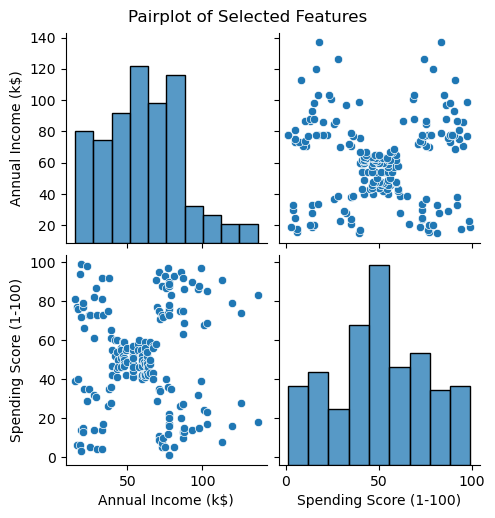

In [67]:
# Check for missing values and data info
print(df.info())
print(df.isnull().sum())

# Visualize distribution of features
sns.pairplot(df[['Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


###  Feature Distribution Check
- Verified that there are no missing values in the dataset.
- Created a pairplot to explore the distributions of Annual Income and Spending Score.
- This helps to understand feature scales and any natural groupings before applying clustering algorithms.


#  Step 3: Select Features for Clustering

In [71]:
# Select the two most relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values


# Step 4: Standardize the Features

In [74]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Apply DBSCAN Algorithm

In [77]:
# Create DBSCAN model
dbscan = DBSCAN(eps=0.3, min_samples=5)  # (eps and min_samples can be tuned)

# Fit and predict cluster labels
labels = dbscan.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = labels


# Step 6: Visualize Clusters

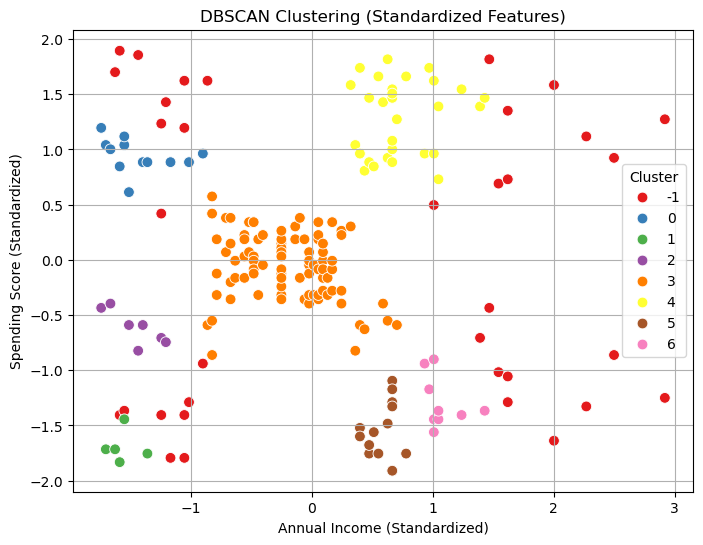

In [80]:
# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels, palette='Set1', s=60)
plt.title('DBSCAN Clustering (Standardized Features)')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### DBSCAN Clustering Visualization
- Visualized the clusters identified by DBSCAN after feature standardization.
- Each color represents a different cluster.
- Noise points (outliers) are automatically handled and given a separate label (-1).


# Step 7: Identify and Visualize Noise Points

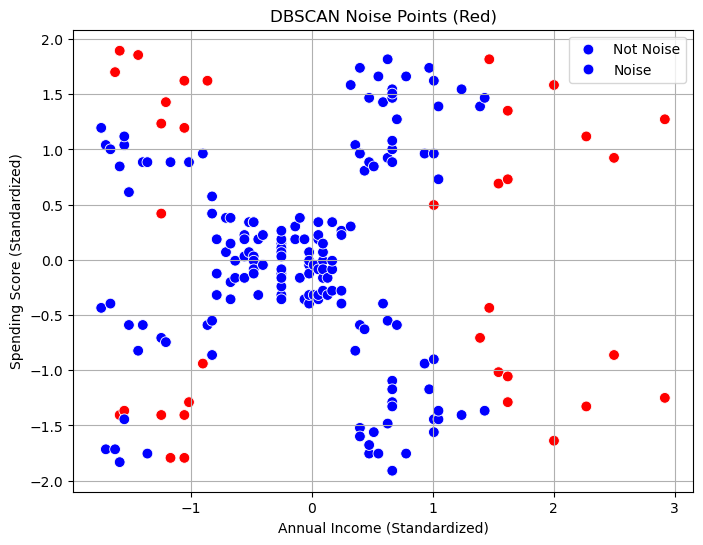

In [84]:
# Plot highlighting noise points
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=(labels==-1), palette={True:'red', False:'blue'}, s=60)
plt.title('DBSCAN Noise Points (Red)')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.legend(['Not Noise', 'Noise'])
plt.grid(True)
plt.show()


###  Highlighting Noise Points
- Plotted a special visualization to highlight noise points detected by DBSCAN.
- Red points represent noise (outliers) that do not belong to any cluster.
- Blue points represent regular cluster members.


# Step 8: Evaluate Clustering

In [88]:
# Count number of clusters (ignoring noise if any)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

# If there are clusters (silhouette score needs at least 2 clusters)
if n_clusters > 1:
    silhouette = silhouette_score(X_scaled, labels)
    print(f'Silhouette Score: {silhouette:.4f}')
else:
    print('Not enough clusters to compute silhouette score.')


Estimated number of clusters: 7
Estimated number of noise points: 35
Silhouette Score: 0.3161


### Clustering Quality Metrics
- Estimated the number of clusters formed (excluding noise).
- Counted the number of noise points.
- Calculated the Silhouette Score to assess how well the clusters are separated.
- A higher silhouette score indicates better-defined clusters.
